# [0-1] импорта данных нужного датасета

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка визуализации
sns.set_theme(style="whitegrid")
%matplotlib inline

# ЗАГРУЗКА ДАННЫХ
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, sep='\t')

print("Данные успешно загружены!")
print("Форма датасета:", data.shape)


Данные успешно загружены!
Форма датасета: (2240, 29)


# [2] Описание постановки задачи

Постановка задачи
Цель: Предсказать, откликнется ли клиент на последнюю маркетинговую кампанию (целевая переменная: Response).

Тип задачи: Классификация (дискретная целевая переменная)

Целевая переменная принимает значения: 0 (клиент не откликнулся) или 1 (клиент откликнулся.

Гипотеза:
Клиенты с большим доходом, историей совершённых покупок и активным взаимодействием с компанией с большей вероятностью откликнутся на маркетинговые кампании.

О клиенте:
ID: Уникальный идентификатор клиента (неинформативный признак, подлежит удалению при обучении).
Year_Birth: Год рождения
Education: Уровень образования (Graduation, PhD, Master и т.д.).
Marital_Status: Семейное положение.
Income: Годовой доход семьи.
Kidhome, Teenhome: Количество маленьких детей и подростков в семье.
Dt_Customer: Дата регистрации клиента в компании.
Recency: Количество дней с момента последней покупки.
Complain: 1, если клиент жаловался за последние 2 года, иначе 0.

Поведение и траты
MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Сумма, потраченная на соответствующие категории товаров за последние 2 года.

Активность
NumDealsPurchases: Количество покупок со скидкой.
NumWebPurchases: Покупки через сайт.
NumCatalogPurchases: Покупки через каталог.
NumStorePurchases: Покупки непосредственно в магазине.
NumWebVisitsMonth: Количество посещений веб-сайта за последний месяц.

История предыдущих кампаний
AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5: Бинарные флаги (1/0). Принял ли клиент предложение в соответствующей прошлой кампании.


# [3] Распределение целевой переменной гистограммой

Количество значений целевой переменной:
Response
0    1906
1     334
Name: count, dtype: int64
------------------------------
Процентное соотношение классов:
Response
0    85.089286
1    14.910714
Name: proportion, dtype: float64


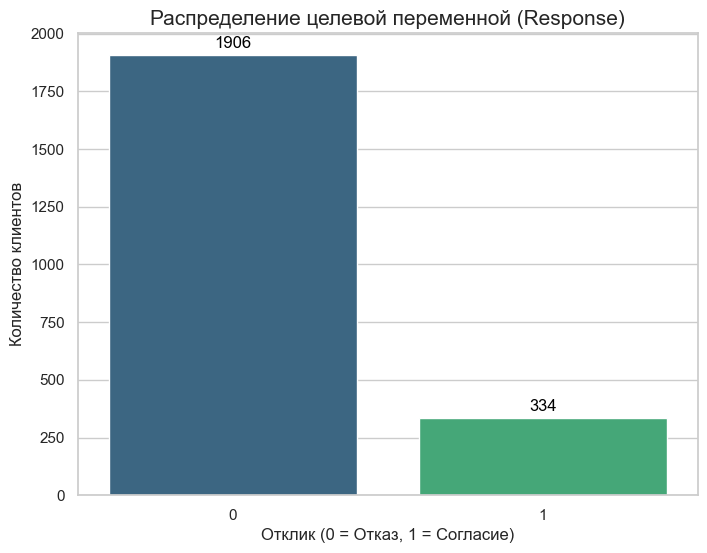

In [4]:
# --- АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ---

# 1. Считаем количество уникальных значений (абсолютные числа)
target_counts = data['Response'].value_counts()
print("Количество значений целевой переменной:")
print(target_counts)

print("-" * 30)

# 2. Считаем процентное соотношение
target_percent = data['Response'].value_counts(normalize=True) * 100
print("Процентное соотношение классов:")
print(target_percent)

# 3. Строим график
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Response', data=data, palette='viridis', hue='Response', legend=False)

plt.title('Распределение целевой переменной (Response)', fontsize=15)
plt.xlabel('Отклик (0 = Отказ, 1 = Согласие)', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

# Добавляем числа над столбцами 
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


# [4] Cтатистики по переменным 

In [5]:
# --- ОСНОВНЫЕ СТАТИСТИКИ ---

print("Описательная статистика (числовые переменные):")
display(data.describe()) 

# Аналогичная
# print(data.describe())



Описательная статистика (числовые переменные):


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# [5] Информаиця о датасете

In [6]:
# --- ИНФОРМАЦИЯ О ДАТАСЕТЕ ---

print("Общая информация о датасете:")
data.info()


# Альтернативный вывод более компактно
n_rows, n_cols = data.shape
total_cells = n_rows * n_cols

print("КРАТКАЯ СВОДКА:")
print(f"Размер датасета: {data.shape}")
print(f"Числовые колонки: {data.select_dtypes(include=['int64', 'float64']).shape}")
print(f"Текстовые колонки: {data.select_dtypes(include=['object']).shape}")
print(f"Всего non-null элементов: {data.count().sum()} из {total_cells}")


Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsP

# [6] Количество пропусков

In [7]:
# --- АНАЛИЗ И ОБРАБОТКА ПРОПУСКОВ ---

# 1. Считаем количество пропусков в каждой колонке
missing_values = data.isnull().sum()

# 2. Фильтруем и выводим только те колонки, где пропусков > 0
missing_only = missing_values[missing_values > 0]

print("Количество пропусков по колонкам:")
print(missing_only)

print("-" * 30)

# 3. Считаем процент пропусков 
missing_percent = (missing_only / len(data)) * 100
print("Процент пропусков:")
print(missing_percent)


Количество пропусков по колонкам:
Income    24
dtype: int64
------------------------------
Процент пропусков:
Income    1.071429
dtype: float64


# [7] Гистограммы по признакам

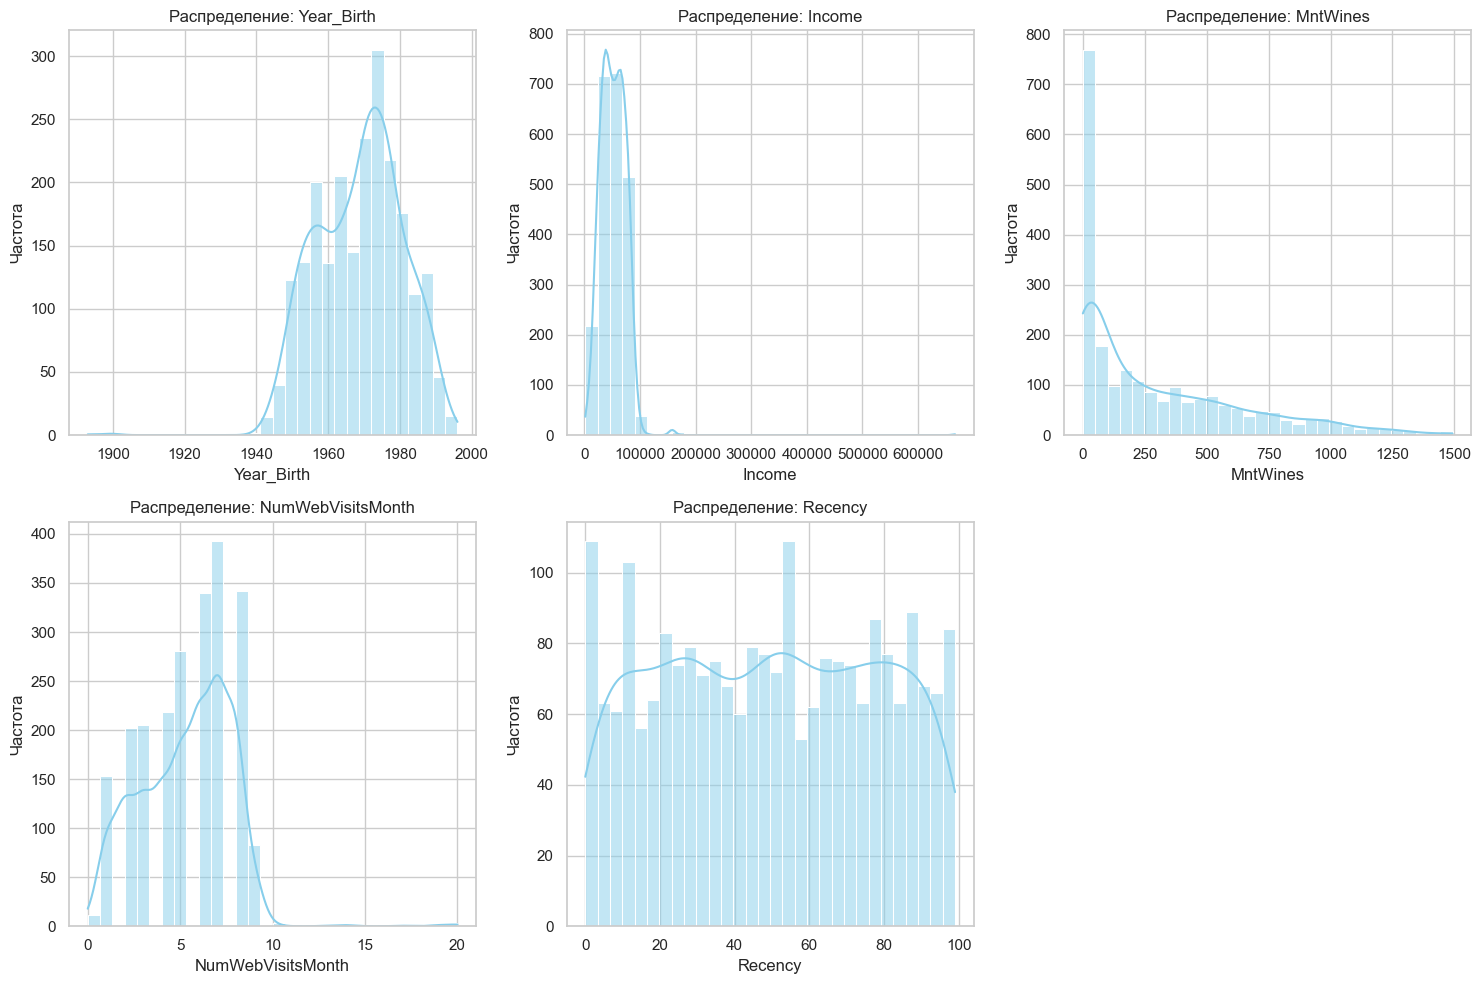

In [8]:
# --- ГИСТОГРАММЫ ПРИЗНАКОВ ---

# Выбираем 5 интересных колонок
features_to_plot = ['Year_Birth', 'Income', 'MntWines', 'NumWebVisitsMonth', 'Recency']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i) # Сетка 2x3, текущий график i
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue') 
    # kde=True рисует плавную линию поверх гистограммы
    plt.title(f'Распределение: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout() # Чтобы графики не наезжали друг на друга
plt.show()


1. Year_Birth (Год рождения):

Распределение похоже на нормальное, но смещено влево
Аномалии: Виден длинный хвост слева, уходящий в начало 1900-х годов. Это явные выбросы. Клиентам с годом рождения 1893 сейчас более 130 лет, что невозможно. Эти записи нужно будет удалить или исправить.

2. Income (Доход):

Распределение имеет правостороннюю асимметрию . Большинство людей имеют средний доход, но есть длинный "хвост" очень богатых клиентов справа. Типичное для такого признака

3. MntWines (Траты на вино):

Наблюдение: Сильно скошено вправо (Exponential distribution).
Огромное количество людей тратит на вино 0 или очень мало (высокий столбик слева), но есть группа, которые тратят очень много. Это хороший сегментирующий признак.

4. NumWebVisitsMonth (Визиты на сайт):

Близко к нормальному (колоколообразному) распределению, слегка скошенному вправо.
Большинство заходит на сайт 5-7 раз в месяц. Хвост справа (очень частые визиты).

5. Recency (Давность покупки):

Распределение равномерное (Uniform). Нет ярко выраженного пика.
Клиенты распределены по времени последней покупки равномерно от 0 до 99 дней. Это хорошо, значит, данные собирались корректно, без перекосов в какую-то конкретную дату среза.

# [8] Графики зависимости переменных

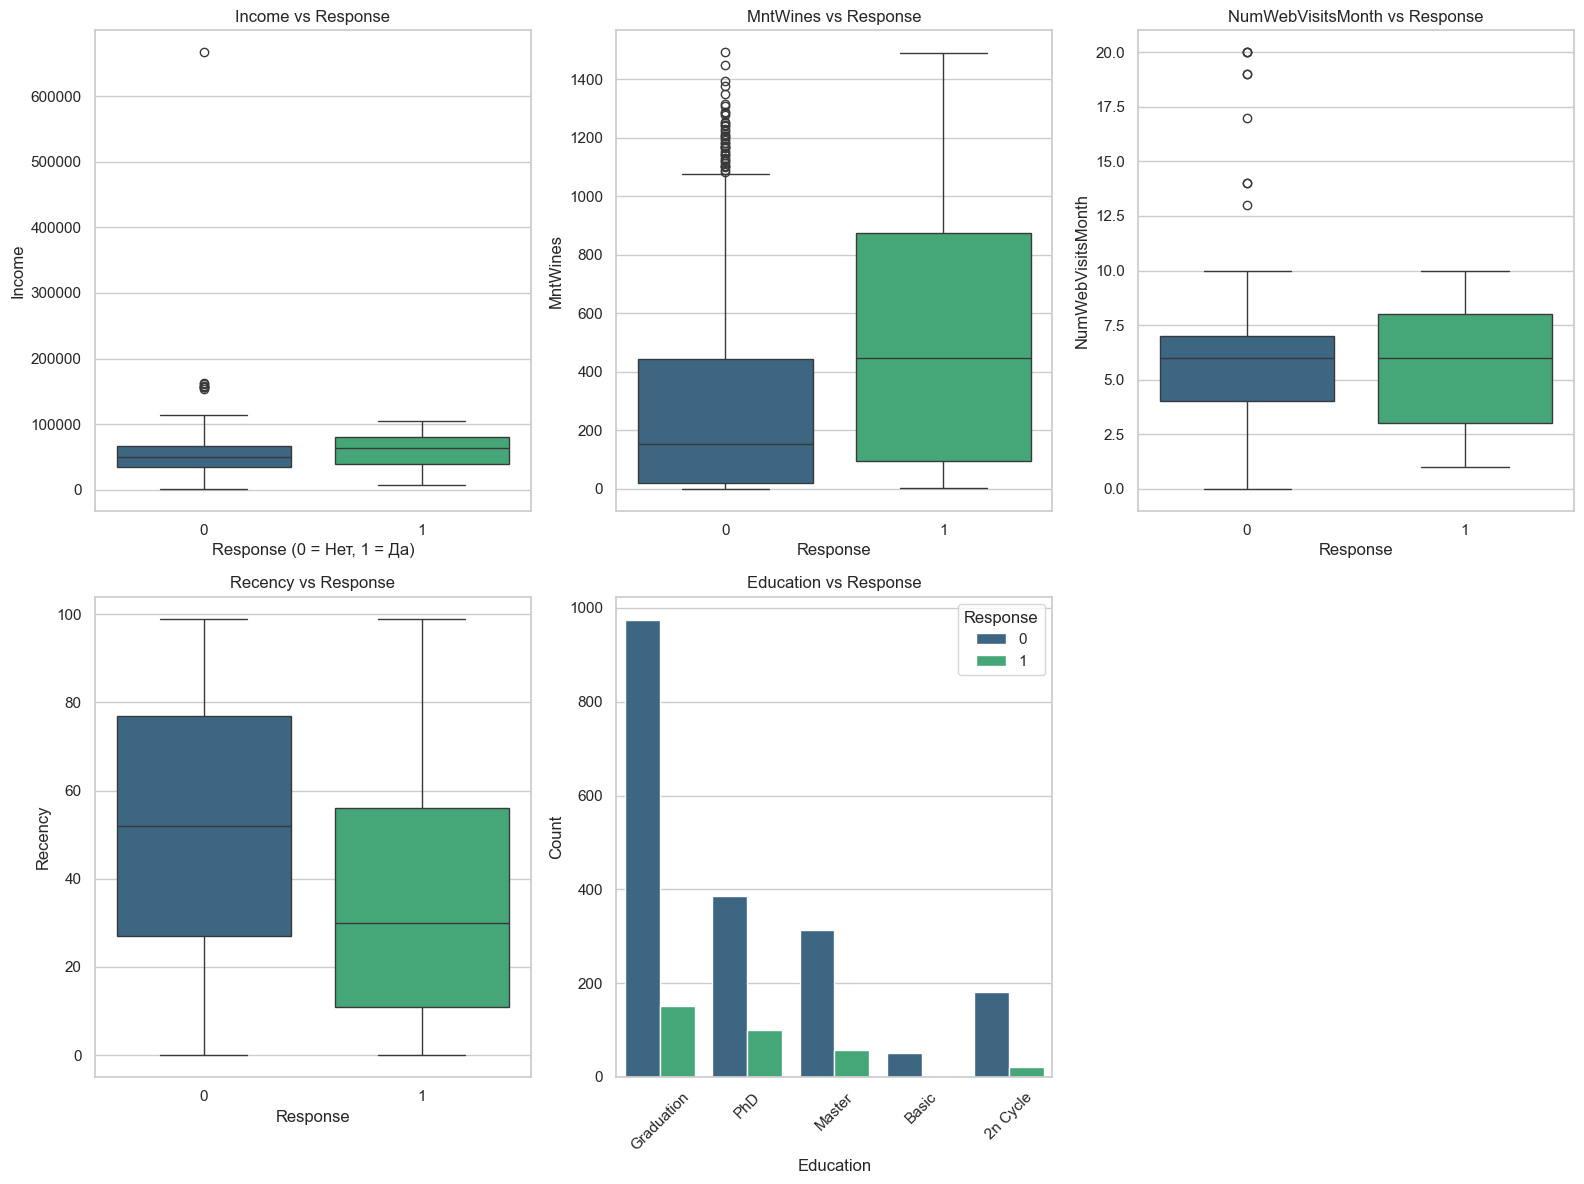

In [9]:
# --- ЗАВИСИМОСТЬ ПРИЗНАКОВ ОТ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (БОКСПЛОТЫ БЕЗ WARNING) ---

plt.figure(figsize=(16, 12))

# 1. Income vs Response
plt.subplot(2, 3, 1)
sns.boxplot(x='Response', y='Income', hue='Response', data=data,
            palette='viridis', legend=False)
plt.title('Income vs Response')
plt.xlabel('Response (0 = Нет, 1 = Да)')
plt.ylabel('Income')

# 2. MntWines vs Response
plt.subplot(2, 3, 2)
sns.boxplot(x='Response', y='MntWines', hue='Response', data=data,
            palette='viridis', legend=False)
plt.title('MntWines vs Response')
plt.xlabel('Response')
plt.ylabel('MntWines')

# 3. NumWebVisitsMonth vs Response
plt.subplot(2, 3, 3)
sns.boxplot(x='Response', y='NumWebVisitsMonth', hue='Response', data=data,
            palette='viridis', legend=False)
plt.title('NumWebVisitsMonth vs Response')
plt.xlabel('Response')
plt.ylabel('NumWebVisitsMonth')

# 4. Recency vs Response
plt.subplot(2, 3, 4)
sns.boxplot(x='Response', y='Recency', hue='Response', data=data,
            palette='viridis', legend=False)
plt.title('Recency vs Response')
plt.xlabel('Response')
plt.ylabel('Recency')

# 5. Education vs Response (оставляем как есть — тут palette легален, т.к. есть hue)
plt.subplot(2, 3, 5)
sns.countplot(x='Education', hue='Response', data=data, palette='viridis')
plt.title('Education vs Response')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Income vs Response
Клиенты, которые откликнулись на кампанию (Response = 1), в среднем имеют более высокий доход, чем те, кто отказался. Это говорит о том, что доход может быть полезным признаком для прогнозирования отклика.

MntWines vs Response
У откликнувшихся клиентов заметно выше траты на вино, чем у неоткликнувшихся. Это указывает на связь между общей покупательной активностью (особенно по сегменту вина) и готовностью принять новое предложение

NumWebVisitsMonth vs Response
Клиенты с очень частыми визитами на сайт чаще оказываются неоткликнувшимися, что может говорить о том, что одни только визиты не гарантируют отклик; признак имеет слабую или нелинейную взаимосвязь с целевой переменной.

Recency vs Response
У откликнувшихся клиентов значения Recency, как правило, ниже (они покупали относительно недавно), что логично: более “теплые” клиенты чаще принимают новые предложения. Этот признак можно использовать для прогнозирования отклика.

Education vs Response
Распределение откликов по уровням образования не показывает сильных различий между группами, поэтому образование, вероятно, является слабым предиктором отклика по сравнению с поведенческими и финансовыми признаками.

# [9] Зависимость 2-х переменных от целой

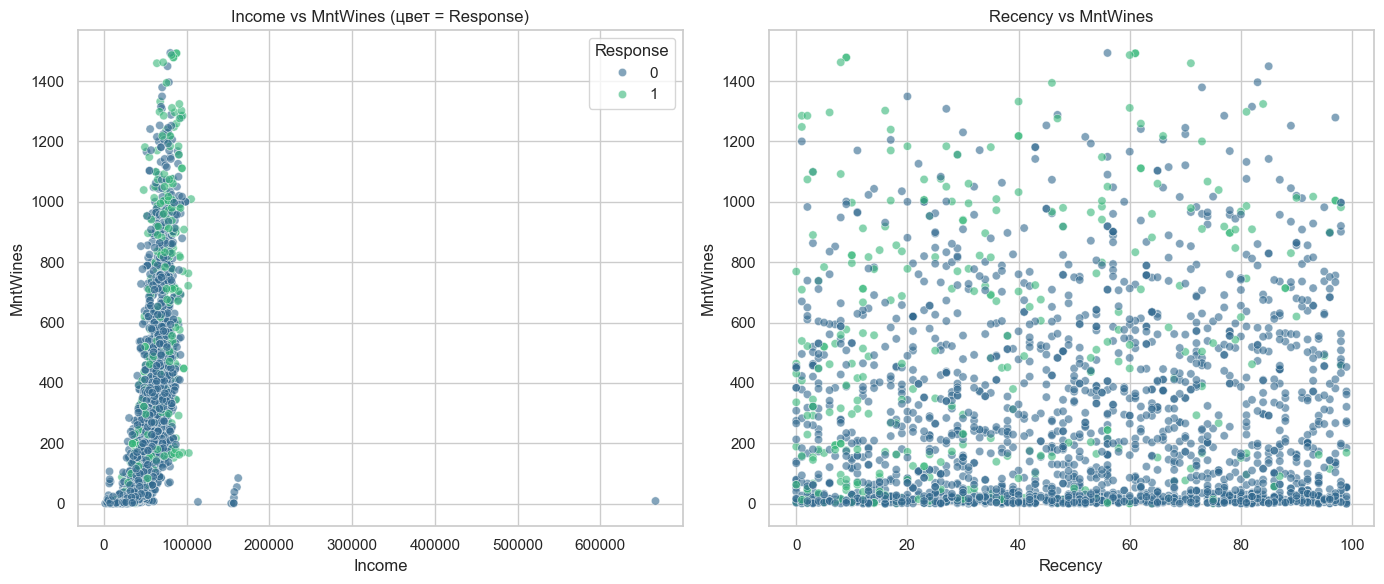

In [10]:
# --- ДВЕ ПЕРЕМЕННЫЕ ОДНОВРЕМЕННО vs ЦЕЛЕВАЯ ---

plt.figure(figsize=(14, 6))

# 1. Income vs MntWines 
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=data,
    x='Income',
    y='MntWines',
    hue='Response',           # цвет = целевая переменная
    palette='viridis',
    alpha=0.6
)
plt.title('Income vs MntWines (цвет = Response)')
plt.xlabel('Income')
plt.ylabel('MntWines')

# 2. Recency vs MntWines 
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=data,
    x='Recency',
    y='MntWines',
    hue='Response',
    palette='viridis',
    alpha=0.6,
    legend=False              
)
plt.title('Recency vs MntWines')
plt.xlabel('Recency')
plt.ylabel('MntWines')

plt.tight_layout()
plt.show()


Доход и траты на вино

Income vs MntWines vs Response
На диаграмме видно, что объекты с Response = 1 (откликнувшиеся клиенты) чаще сосредоточены в области более высоких доходов и больших трат на вино, тогда как класс 0 доминирует в зоне низких доходов и малых покупок. Это говорит о том, что комбинация признаков доход + активность в категории вина хорошо разделяет классы и явно может быть использована для прогнозирования отклика.​​

Recency vs MntWines vs Response
Точки с Response = 1 чаще встречаются в зоне меньших значений Recency (покупали недавно) и при этом имеют более высокие траты на вино, тогда как Response = 0 сильнее сконцентрирован при больших значениях Recency и меньших тратах. Это подтверждает, что совместное использование признаков Recency и MntWines помогает лучше отделять откликнувшихся клиентов от остальных и делает их полезными для модельного прогноза.


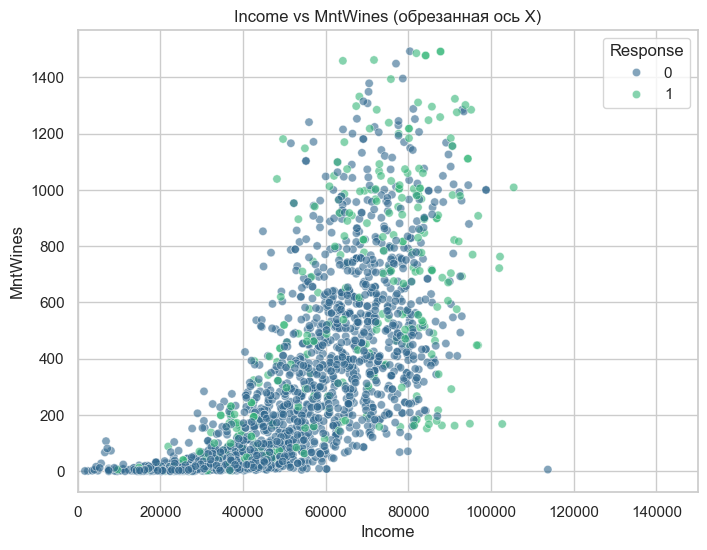

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='Income',
    y='MntWines',
    hue='Response',
    palette='viridis',
    alpha=0.6
)

plt.xlim(0, 150000)  # ограничиваем максимум по доходу
plt.title('Income vs MntWines (обрезанная ось X)')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()


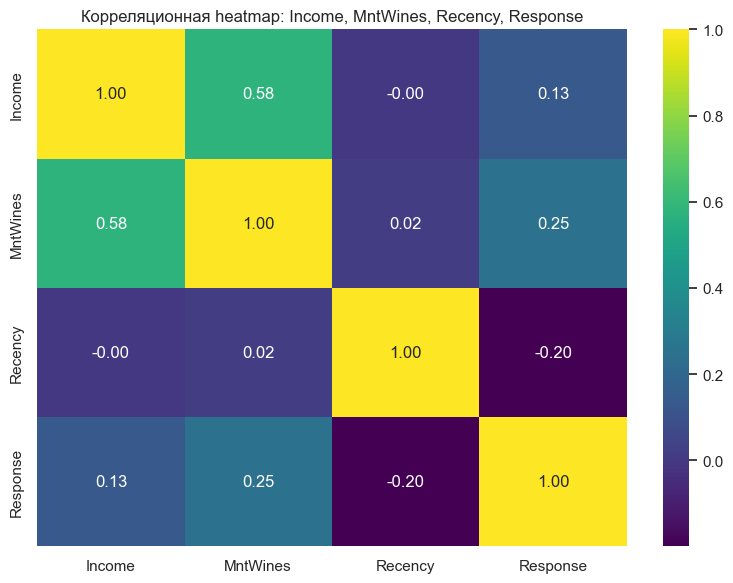

In [12]:
# --- HEATMAP: связь признаков с целевой переменной ---

plt.figure(figsize=(8, 6))

# Берём только нужные признаки + целевую
cols = ['Income', 'MntWines', 'Recency', 'Response']
corr = data[cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    fmt='.2f'
)

plt.title('Корреляционная heatmap: Income, MntWines, Recency, Response')
plt.tight_layout()
plt.show()
